# Evaluating the Feasibility of Using Remote Sensing Foundation Models for Multimodal Fusion and Pixelwise Regression
Michael Marks

Geog 780 - Geocomputation

12/12/2024

## Introduction
Accurate vegetation structure measurements are critical for wildfire mitigation and biodiversity management. However, integrating multimodal remote sensing data, such as SAR and high-resolution optical imagery, is challenging due to variations in spatial and spectral characteristics. This project will test the feasibility of using the Clay Foundation Model to fuse SAR and optical data for precise, pixelwise vegetation structure analysis.

## Problem Statement
Current methods for multimodal data integration are limited in their ability to consistently merge SAR and optical imagery due to differences in resolution and spectral response. The Clay Foundation model’s dynamic embedding capabilities offer a potential solution for pixelwise regression, addressing the need for scalable and high-precision vegetation measurements.

## Objectives
- Assess the feasibility of using the [Clay Foundation model](https://clay-foundation.github.io/model/index.html) to integrate SAR and high-resolution optical data for vegetation structure analysis.
- Test model fine-tuning on wavelengths and resolutions previously unseen by the model.

## Approach

1. **Computational Setup** - Configure the TIDE computational cluster.

2. **Clay Model Setup** - Download the Clay Foundation model and run initial tests.

3. **Initial Data Integration and Visualization** - Test multimodal integration by inputting SAR and optical data into the Clay model. Visualize initial embeddings to examine how well multimodal features are represented, and attempt reconstruction to assess detail retention.

4. **Model Fine-Tuning** - Attempt to fine-tune the Clay model on SAR and optical data.

5. **Post-Fine-Tuning Evaluation** - Re-evaluate and visualize embeddings and reconstructions from the fine-tuned model to assess improvements in data integration and feature fidelity.

## Data Sources

### Synthetic Aperture Radar (SAR)
- **L-Band (23.84 cm)**: UAVSAR (6.17 m resolution)
- **C-Band (5.6 cm)**: Sentinel-1 (5m x 20m resolution)

### High-Resolution Optical Imagery
- **WorldView-2**: 0.46 m panchromatic, 1.84 m multispectral
- **WorldView-3**: 0.31 m panchromatic, 1.24 m multispectral, and 3.7 m shortwave infrared

## Computational Setup 
The Technology Infrastructure for Data Exploration (TIDE) at San Diego State University is a high-performance computing facility supporting advanced research in machine learning and artificial intelligence. It features 18 GPU nodes (72 GPUs in total, including NVIDIA L40 and A100 accelerators), 6 CPU nodes, and 3 storage nodes providing 240 TB of usable storage. TIDE offers a managed JupyterHub environment with pre-built software containers for seamless research workflows. Users can dynamically allocate RAM, GPU, and CPU resources to customize their computational environment; the code below outlines the configuration of my setup.

In [1]:
import os, psutil, torch, pandas as pd

def get_cluster_specs():
    cpu = {
        "CPU Model": os.popen("lscpu | grep 'Model name' | awk -F': ' '{print $2}'").read().strip(),
        "Total CPUs": psutil.cpu_count(logical=True),
        "Total Memory (GB)": round(psutil.virtual_memory().total / (1024 ** 3), 2),
    }
    gpu = {"GPU Count": torch.cuda.device_count()} if torch.cuda.is_available() else {"GPU Count": 0, "GPU Specs": "No GPU available"}
    if gpu["GPU Count"]:
        gpu["GPU Specs"] = "; ".join(
            f"{torch.cuda.get_device_name(i)} (Memory: {round(torch.cuda.get_device_properties(i).total_memory / (1024 ** 3), 2)} GB, CUDA Cores: {torch.cuda.get_device_properties(i).multi_processor_count * torch.cuda.get_device_properties(i).major * 64})"
            for i in range(gpu["GPU Count"])
        )
    storage = {
        "Total Storage (GB)": round(psutil.disk_usage('/').total / (1024 ** 3), 2),
        "Available Storage (GB)": round(psutil.disk_usage('/').free / (1024 ** 3), 2),
    }
    return {**cpu, **gpu, **storage}

df = pd.DataFrame.from_dict(get_cluster_specs(), orient="index", columns=["Configuration"])
display(df)



Configuration
CPU Model                                  Intel(R) Xeon(R) Silver 4410Y
Total CPUs                                                            24
Total Memory (GB)                                                 503.41
GPU Count                                                              1
GPU Specs               NVIDIA L40 (Memory: 44.31 GB, CUDA Cores: 72704)
Total Storage (GB)                                                799.61
Available Storage (GB)                                            532.56

# Foundation Models and the Clay Model

Foundation models are a type of artificial intelligence trained on large datasets to learn generalized patterns and relationships, enabling them to perform a wide range of tasks. In Earth observation, foundation models can synthesize vast amounts of satellite data to address climate and environmental challenges. The Clay Foundation Model is an open-source AI designed specifically for Earth observation tasks, such as mapping land cover, monitoring vegetation, and detecting changes like deforestation or urban growth.

## What the Clay Model Does

The Clay model processes satellite imagery, location, and time data to produce **embeddings**—mathematical representations of specific areas on Earth at a given time. These embeddings encode spatial, temporal, and spectral relationships, making them versatile for various applications. Built using a Vision Transformer architecture, Clay employs **Masked Autoencoding (MAE)** for self-supervised learning, training the model to predict missing information and better understand complex data.

## How the Model Is Used

Clay can be applied in three primary ways:  
1. **Generating Embeddings**: Use embeddings to identify features like surface mines or aquaculture facilities.  
2. **Fine-Tuning for Tasks**: Adapt the model for specific goals, such as classifying crop types, predicting biomass, or detecting changes over time (e.g., wildfires or flooding).  
3. **As a Backbone for Other Models**: Integrate Clay into larger machine learning systems for custom tasks.  

## Multimodal Data Integration

The Clay model is designed to process and integrate **multimodal data**, leveraging inputs from different satellite sensors. This includes:  
- **Optical Data**: Multispectral imagery from sources like Sentinel-2 and Landsat.  
- **Radar Data**: Synthetic Aperture Radar (SAR) data from Sentinel-1.  
- **Metadata**: Sensor-specific information, such as wavelengths, ground sampling distance (GSD), and temporal data.  

## Model Highlights

- **Architecture**: Includes components like dynamic embedding blocks, position encoding for geospatial and temporal data, and a MAE to reconstruct sensor data.  
- **Training**: Pretrained on 70 million global image chips (224x224 pixels) across multiple satellite sensors (e.g., Sentinel-1, Sentinel-2, Landsat) with varied resolutions and wavelengths.  
- **Technical Specs**: Features 201 million parameters, a model size of 768MB, and uses metadata like latitude, longitude, and ground sampling distance for context-aware predictions.

## How the Model Is Used

Clay can be applied in three primary ways:
1. **Generating Embeddings**: Use embeddings to identify features like surface mines or aquaculture facilities.
2. **Fine-Tuning for Tasks**: Adapt the model for specific goals, such as classifying crop types, predicting biomass, or detecting changes over time (e.g., wildfires or flooding).
3. **As a Backbone for Other Models**: Integrate Clay into larger machine learning systems for custom tasks.

## Multimodal Data Integration

The Clay model is designed to process and integrate **multimodal data**, leveraging inputs from different satellite sensors. This includes:
- **Optical Data**: Multispectral imagery from sources like Sentinel-2 and Landsat.
- **Radar Data**: Synthetic Aperture Radar (SAR) data from Sentinel-1.
- **Metadata**: Sensor-specific information, such as wavelengths, ground sampling distance (GSD), and temporal data.

## Model Highlights

- **Architecture**: Includes components like dynamic embedding blocks, position encoding for geospatial and temporal data, and a MAE to reconstruct sensor data.
- **Training**: Pretrained on 70 million global image chips (224x224 pixels) across multiple satellite sensors (e.g., Sentinel-1, Sentinel-2, Landsat) with varied resolutions and wavelengths.
- **Technical Specs**: Features 201 million parameters, a model size of 768MB, and uses metadata like latitude, longitude, and ground sampling distance for context-aware predictions.


In [2]:
import sys
import os
# sys.path.append("../..")
sys.path.append(os.path.join(os.getcwd(), "clay_model/"))

from clay_model.src.model import ClayMAEModule
import torch
import warnings
from torchsummary import summary

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
    ckpt = "/home/jovyan/geoai_veg_map/clay_model/checkpoints/v1/clay-v1-base.ckpt"
    
    torch.set_default_device(device)
    
    model = ClayMAEModule.load_from_checkpoint(
        ckpt, metadata_path=os.path.join(os.getcwd(), "/home/jovyan/geoai_veg_map/clay_model/configs/metadata.yaml"), shuffle=False, mask_ratio=0
    )
    model.eval()
    
    model = model.to(device)



# Assuming your model is defined as `model`
model_summary = summary(model, input_size=(3, 256, 256))

/home/jovyan/.cache/pypoetry/virtualenvs/geoai-veg-map-cAFrKsT4-py3.11/lib/python3.11/site-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


Layer (type:depth-idx)                        Param #
├─ClayMAE: 1-1                                --
|    └─VisionTransformer: 2-1                 --
|    |    └─PatchEmbed: 3-1                   (590,592)
|    |    └─Dropout: 3-2                      --
|    |    └─Identity: 3-3                     --
|    |    └─Identity: 3-4                     --
|    |    └─Sequential: 3-5                   (85,054,464)
|    |    └─LayerNorm: 3-6                    (1,536)
|    |    └─Identity: 3-7                     --
|    |    └─Dropout: 3-8                      --
|    |    └─Identity: 3-9                     --
|    └─Resize: 2-2                            --
|    └─Linear: 2-3                            590,592
|    └─Encoder: 2-4                           --
|    |    └─DynamicEmbedding: 3-10            7,082,240
|    |    └─Transformer: 3-11                 85,019,136
|    └─Decoder: 2-5                           --
|    |    └─Linear: 3-12                      393,728
|    |    └─Trans

## Data Sources for the Clay Model

The developers of the Clay model aimed to create a general-purpose architecture capable of processing data from a wide range of platforms, including satellites, aerial systems, and drones. To achieve this, they designed a model that can handle inputs with diverse spectral bands, resolutions, and spatial dimensions. Their work draws inspiration from earlier foundational models like Prithvi, SatMAE, ScaleMAE, DOFA, and SpectralGPT.

### Modeling Decisions

To support the generality of the model, the developers emphasized the importance of training on a highly varied dataset. They identified four key characteristics that needed to be represented in the training data:

- **Spectral Band Definitions**: Including data across a wide range of wavelengths, from optical to radar.
- **Spatial Distribution**: Ensuring global coverage to capture diverse geographic patterns.
- **Temporal Distribution**: Incorporating data from different times of the year and across multiple years.
- **Ground Sampling Distance (GSD)**: Including imagery at varying spatial resolutions.

### Criteria for Platform Selection

Given the sheer number of potential data sources, the developers narrowed their focus by using the following criteria for platform selection:

1. **Availability in the Cloud**: Easily accessible datasets.
2. **Existence of STAC Catalogs**: Standardized metadata for remote sensing data.
3. **Cloud-Optimized Formats**: Efficient storage and retrieval for large-scale processing.

Based on these criteria, the developers selected the following platforms for training the initial version of the Clay model:

| Platform          | Spatial Coverage | Spectral Bands    | GSD (meters) |
|--------------------|------------------|-------------------|--------------|
| **Landsat 8 and 9** | Global           | 6 optical bands   | 30           |
| **Sentinel 2 L2A** | Global           | 10 optical bands  | 10           |
| **Sentinel 1 RTC** | Global           | 2 radar bands     | 10           |
| **NAIP**           | USA              | 4 optical bands   | < 1          |
| **LINZ**           | New Zealand      | 3 optical bands   | < 0.5        |

## Getting Started Using Sentinel-1 and Sentinel-2
#### SpatioTemporal Asset Catalogs (STAC)
- [STAC Intro](https://stacspec.org/en/tutorials/intro-to-stac/)
- [Planetary Computer STAC](https://planetarycomputer.microsoft.com/api/stac/v1)

In [3]:
import pystac_client
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import stackstac
import numpy as np
from rasterio.enums import Resampling
from shapely.geometry import box

import requests
import pystac_client
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import stackstac
import numpy as np
from rasterio.enums import Resampling
import folium
from pyproj import Transformer
import rasterio
from stackstac import stack
import pystac
from pyproj import Transformer


def create_data_stack(bbox, start_date, end_date, stac_source, collection, assets, out_resolution, bbox_crs="EPSG:4326", target_crs=None, resampling_method = Resampling.cubic):
    """
    Creates a data stack from a STAC API or local STAC catalog within a specified bounding box.

    If the collection is 'sentinel-1-rtc', a SAS token is fetched and appended to asset URLs for authenticated access.

    Parameters:
        bbox (tuple): Bounding box as (minx, miny, maxx, maxy) in bbox_crs units.
        start_date (str): Start date in "YYYY-MM-DD" format.
        end_date (str): End date in "YYYY-MM-DD" format.
        stac_source (str): URL of the STAC API or path to a local STAC catalog file.
        collection (str): Collection name for the data.
        assets (list): List of assets to include in the stack.
        out_resolution (float): Ground sampling distance (GSD) in meters for the output resolution.
        bbox_crs (str, optional): CRS of the input bounding box. Default is "EPSG:4326".
        target_crs (str, optional): CRS for the resulting image. If not provided, inferred from the first item.
        resampling_method (rasterio.enums.Resampling, optional): Resampling method to use. Default is Resampling.cubic.

    Returns:
        xarray.DataArray: The computed data stack with resampled dimensions.
    """
    # Reproject bbox to EPSG:4326 if necessary for pystac_client search
    if bbox_crs != "EPSG:4326":
        transformer = Transformer.from_crs(bbox_crs, "EPSG:4326", always_xy=True)
        minx, miny, maxx, maxy = bbox
        minx, miny = transformer.transform(minx, miny)
        maxx, maxy = transformer.transform(maxx, maxy)
        bbox_4326 = (minx, miny, maxx, maxy)
    else:
        bbox_4326 = bbox

    # Step 1: Open the STAC source (API or local catalog)
    if os.path.exists(stac_source):
        print("Opening local STAC catalog...")
        catalog = pystac.read_file(stac_source)
        items = []
        for item in catalog.get_all_items():
            if item.collection_id == collection:
                item_date = item.datetime.date()
                if start_date <= str(item_date) <= end_date:
                    items.append(item)
    else:
        print("Connecting to STAC API...")
        client = pystac_client.Client.open(stac_source)
        search = client.search(
            collections=[collection],
            datetime=f"{start_date}/{end_date}",
            bbox=bbox_4326,
            max_items=100,
        )
        all_items = search.get_all_items()

        # Reduce to one item per date. (Might want to remove this later)
        items = []
        dates = []
        for item in all_items:
            if item.datetime.date() not in dates:
                items.append(item)
                dates.append(item.datetime.date())

    if not items:
        raise ValueError("No items found for the specified parameters.")

    print(f"Found {len(items)} items in the collection '{collection}'")

    # Step 2: If collection is 'sentinel-1-rtc', fetch SAS token and append to asset hrefs
    sas_token = None
    if collection == "sentinel-1-rtc":
        sas_token_url = f"https://planetarycomputer.microsoft.com/api/sas/v1/token/{collection}"
        try:
            response = requests.get(sas_token_url)
            response.raise_for_status()
            sas_token = response.json()["token"]
            print("Fetched SAS token for 'sentinel-1-rtc' collection.")
        except requests.RequestException as e:
            raise ConnectionError(f"Failed to fetch SAS token: {e}")

        # Append SAS token to asset hrefs
        for item in items:
            for asset_key, asset in item.assets.items():
                # Avoid duplicating tokens if already appended
                if f"?{sas_token}" not in asset.href:
                    asset.href = f"{asset.href}?{sas_token}"
                else:
                    print(f"Asset '{asset_key}' in item '{item.id}' already has query parameters.")

    # Print original gsd for the first asset of the first item    
    with rasterio.open(items[0].assets[assets[0]].href) as src:
        # orig_width = src.width
        # orig_height = src.height
        orig_resolution = src.res
        print(f"Original '{assets[0]}' Image Resolution: {orig_resolution[0]} x {orig_resolution[1]} gsd.")# EPSG:{items[0].properties['proj:epsg']}")
        

    # Determine the target CRS if not provided
    if target_crs is None:
        if 'proj:epsg' in items[0].properties:
            target_crs = f"EPSG:{items[0].properties['proj:epsg']}"
        else:
            raise ValueError("No target_crs provided and no 'proj:epsg' property found in items.")

    # Reproject the given bbox from bbox_crs to target_crs
    gdf = gpd.GeoDataFrame(
        geometry=[box(*bbox)],
        crs=bbox_crs
    )
    gdf_target = gdf.to_crs(target_crs)
    reproj_bounds = gdf_target.geometry.iloc[0].bounds  # in target_crs

    # Retrieve the pixel values for the bounding box exactly as reprojected
    stack_data = stack(
        items,
        bounds=reproj_bounds,
        snap_bounds=False,  # do not snap to pixel boundaries
        epsg=int(target_crs.split(":")[1]),
        resolution=out_resolution,
        fill_value=0,
        assets=assets,
        resampling=resampling_method, #https://rasterio.readthedocs.io/en/stable/api/rasterio.enums.html#rasterio.enums.Resampling
        rescale=False
    )

    computed_stack = stack_data.compute()

    # # After stacking and resampling, print resampled dimensions
    print(f"Resampled Dimensions: {computed_stack.sizes.get('x', 'N/A')} x {computed_stack.sizes.get('y', 'N/A')} pixels (at {out_resolution}x{out_resolution} gsd). Stack {target_crs}")
    return computed_stack



In [4]:
def plot_data_stack_bounding_boxes(data_stacks, map_center=None, zoom_start=12):
    """
    Plots bounding boxes of data stacks on a Folium map.

    Parameters:
        data_stacks (list of xarray.DataArray): List of data stacks with bounding box metadata.
        map_center (tuple, optional): Latitude and longitude for centering the map. Default is None (auto-calculated).
        zoom_start (int, optional): Initial zoom level for the map. Default is 12.

    Returns:
        folium.Map: A Folium map with the bounding boxes plotted.
    """
    if not data_stacks:
        raise ValueError("The data_stacks list cannot be empty.")

    # Initialize map center if not provided
    if map_center is None:
        # Compute average center of all bounding boxes after converting to WGS84
        centers = []
        for stack in data_stacks:
            # Extract bounding box and CRS
            bbox = stack.attrs["spec"].bounds
            crs = stack.attrs["crs"].upper()  # Ensure CRS format is 'EPSG:XXXX'
            transformer = Transformer.from_crs(crs, "EPSG:4326", always_xy=True)
            x_min, y_min = transformer.transform(bbox[0], bbox[1])
            x_max, y_max = transformer.transform(bbox[2], bbox[3])
            centers.append(((y_min + y_max) / 2, (x_min + x_max) / 2))
        avg_lat = sum(lat for lat, lon in centers) / len(centers)
        avg_lon = sum(lon for lat, lon in centers) / len(centers)
        map_center = [avg_lat, avg_lon]

    # Create the map
    m = folium.Map(location=map_center, zoom_start=zoom_start)

    # Add bounding boxes to the map
    for stack in data_stacks:
        # Extract bounding box and CRS
        bbox = stack.attrs["spec"].bounds
        crs = stack.attrs["crs"].upper()  # Ensure CRS format is 'EPSG:XXXX'
        transformer = Transformer.from_crs(crs, "EPSG:4326", always_xy=True)
        x_min, y_min = transformer.transform(bbox[0], bbox[1])
        x_max, y_max = transformer.transform(bbox[2], bbox[3])

        # Add bounding box to map
        folium.Rectangle(
            bounds=[(y_min, x_min), (y_max, x_max)],
            color="blue",
            weight=2,
            fill=True,
            fill_color="blue",
            fill_opacity=0.2,
        ).add_to(m)

    return m



In [5]:
common_crs = "EPSG:32610"
# poi_latlon = (34.733724, -120.056433)
# bounds = (-120.069233, 34.720924000000004, -120.043633, 34.746524)
bounds = (768382,3846006,770942,3848566)
# start_end =  ("2024-07-03","2024-07-18")
start_end =  ("2024-06-20","2024-08-01")


# Sentinel-1 Stack
sentinel1_stack = create_data_stack(
    bbox = bounds
    , start_date = start_end[0]
    , end_date = start_end[1]
    ,stac_source="https://planetarycomputer.microsoft.com/api/stac/v1"
    ,collection="sentinel-1-rtc"
    ,assets=["vv", "vh"]
    , bbox_crs="EPSG:32610"
    , target_crs="EPSG:32610"
    , out_resolution = 10
    , resampling_method = Resampling.cubic
)

sentinel2_stack = create_data_stack(
    bbox = bounds
    , start_date = start_end[0]
    , end_date = start_end[1]
    ,stac_source="https://earth-search.aws.element84.com/v1"
    ,collection="sentinel-2-l2a"
    ,assets=["blue", "green", "red", "nir"]
    , bbox_crs="EPSG:32610"
    , target_crs="EPSG:32610"
    , out_resolution = 10
    , resampling_method = Resampling.cubic
)

# landsat_stack = create_data_stack(
#     lat=poi_latlon[0],
#     lon=poi_latlon[1],
#     start='2024-06-14',
#     end=start_end[1],
#     stac_api="https://landsatlook.usgs.gov/stac-server",
#     collection="landsat-c2l2-sr",
#     size=256,
#     gsd=30,
#     assets=["blue", "green", "red", "nir08"],
#     target_crs=common_crs,  # Force alignment to common CRS
# )
# landsat_stack


stacks = [sentinel2_stack, sentinel1_stack]
# Plot the bounding boxes of the data stacks
plot_data_stack_bounding_boxes(stacks)


Connecting to STAC API...


/home/jovyan/.cache/pypoetry/virtualenvs/geoai-veg-map-cAFrKsT4-py3.11/lib/python3.11/site-packages/pystac_client/item_search.py:903: FutureWarning: get_all_items() is deprecated, use item_collection() instead.
  warnings.warn(


Found 4 items in the collection 'sentinel-1-rtc'
Fetched SAS token for 'sentinel-1-rtc' collection.
Original 'vv' Image Resolution: 10.0 x 10.0 gsd.
Resampled Dimensions: 256 x 256 pixels (at 10x10 gsd). Stack EPSG:32610
Connecting to STAC API...


/home/jovyan/.cache/pypoetry/virtualenvs/geoai-veg-map-cAFrKsT4-py3.11/lib/python3.11/site-packages/pystac_client/item_search.py:903: FutureWarning: get_all_items() is deprecated, use item_collection() instead.
  warnings.warn(


Found 8 items in the collection 'sentinel-2-l2a'
Original 'blue' Image Resolution: 10.0 x 10.0 gsd.
Resampled Dimensions: 256 x 256 pixels (at 10x10 gsd). Stack EPSG:32610


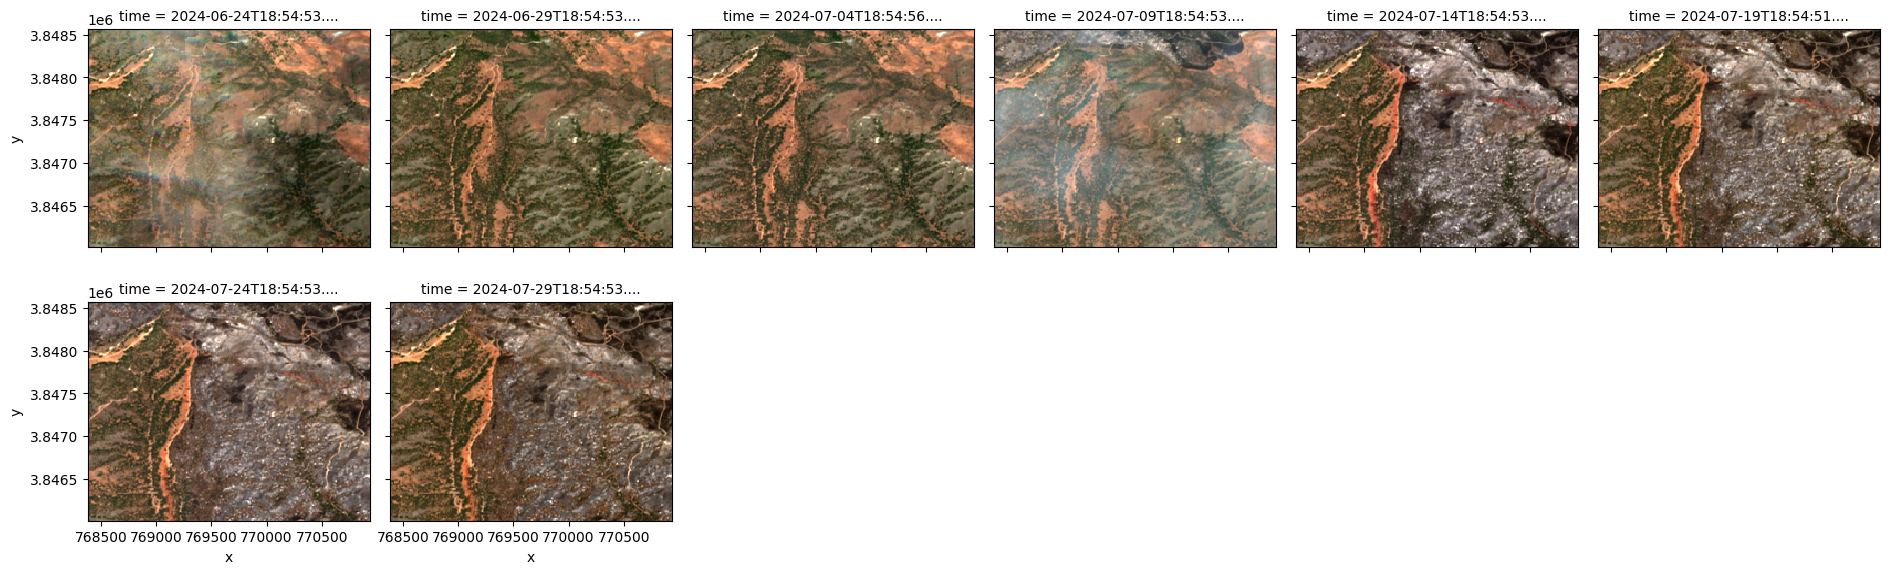

In [6]:
sentinel2_stack.sel(band=["red", "green", "blue"]).plot.imshow(
    row="time", rgb="band", vmin=0, vmax=2000, col_wrap=6
)

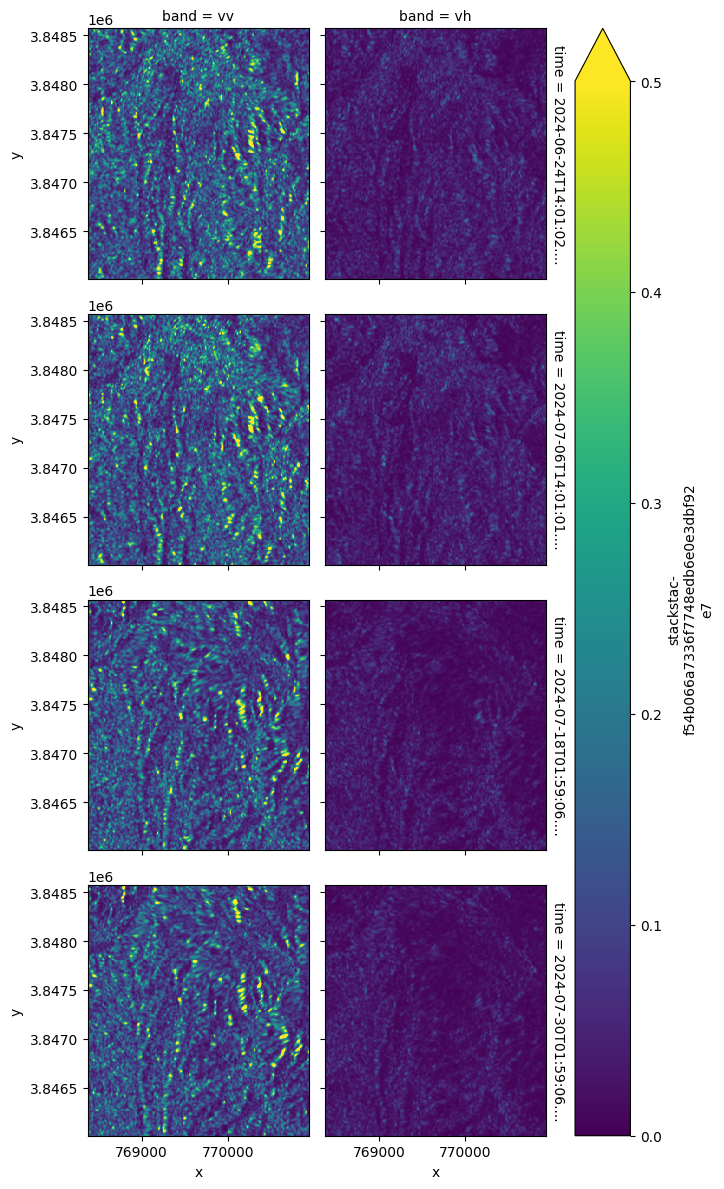

In [7]:
sentinel1_stack.plot.imshow(row="time", col="band", vmin=0, vmax=.5)

## Prepare Data for Model Input

## Model Input Structure

The Clay model accepts multimodal inputs in a structured dictionary format. Each input component is carefully normalized and formatted to align with the model’s requirements.

### **Input Components**
The input dictionary contains the following keys:

1. **pixels**: `batch x band x height x width`  
   - **Description**: Normalized image chips corresponding to multiple sensor bands.  
   - **Preprocessing Steps**:  
     - Extract mean and standard deviation values for each band from the metadata.  
     - Normalize pixel values using:
       
        $\text{Normalized Pixel} = \frac{\text{Raw Pixel} - \text{Mean}}{\text{Standard Deviation}}$


2. **time**: `batch x 4`  
   - **Description**: Normalized datetime embeddings.  
   - **Preprocessing Steps**:  
     - Convert the date into week and hour components.  
     - Apply sinusoidal transformations for periodicity normalization:

       $\text{week\_norm} = (\sin(\text{week}), \cos(\text{week})), \quad \text{hour\_norm} = (\sin(\text{hour}), \cos(\text{hour}))$

3. **latlon**: `batch x 4`  
   - **Description**: Normalized latitude and longitude embeddings.  
   - **Preprocessing Steps**:  
     - Convert latitude and longitude to radians.
     - Apply sinusoidal transformations:
       
       $\text{lat\_norm} = (\sin(\text{lat}), \cos(\text{lat})), \quad \text{lon\_norm} = (\sin(\text{lon}), \cos(\text{lon}))$

4. **waves**: `list[:band]`  
   - **Description**: Central wavelengths of each band used as input.  
   - **Source**: Extracted from the platform-specific metadata configuration file (e.g., `metadata.yaml`).

5. **gsd**: `scalar`  
   - **Description**: Ground sampling distance of the input sensor imagery.  
   - **Source**: Retrieved from the metadata configuration file.

---

### **Normalization and Combination**
The input components are combined into a dictionary:
```python
datacube = {
    "platform": platform,
    "time": torch.tensor(np.hstack((week_norm, hour_norm)), dtype=torch.float32),
    "latlon": torch.tensor(np.hstack((lat_norm, lon_norm)), dtype=torch.float32),
    "pixels": normalized_pixels,  # Shape: batch x band x height x width
    "gsd": torch.tensor(stack.gsd.values),
    "waves": torch.tensor(waves)
}

## Preparing the Data Stack for Model Input

The `prepare_data_stack` function preprocesses imagery data for the Clay model by:

1. **Loading Metadata**: Retrieves normalization parameters (mean, std) and wavelengths for each band.  
2. **Band Normalization**: Normalizes pixel values using metadata.  
3. **Temporal and Spatial Embeddings**: Generates normalized time (week/hour) and lat/lon embeddings.  
4. **Assembling Inputs**: Combines normalized pixels, embeddings, ground sampling distance (gsd), and wavelengths into a dictionary.

This ensures the data aligns with the Clay model's expected input structure.

In [8]:
import numpy as np
import torch
import math
from box import Box
import yaml
from torchvision.transforms import Compose, Normalize

def prepare_data_stack(stack, platform, metadata_path, device, lat, lon):
    """
    Prepares a data stack for input into a model by normalizing pixel values,
    and generating embeddings for time, latitude, longitude, and other metadata.

    Parameters:
        stack (xarray.DataArray): The data stack generated from a STAC API query.
        platform (str): Name of the platform (e.g., 'sentinel-1-rtc').
        metadata_path (str): Path to the metadata YAML configuration file.
        device (torch.device): Device to which tensors should be moved (e.g., 'cuda' or 'cpu').
        lat (float): Latitude of the point of interest.
        lon (float): Longitude of the point of interest.

    Returns:
        dict: A dictionary containing prepared data and embeddings for model input.
    """
    # Load metadata
    metadata = Box(yaml.safe_load(open(metadata_path)))

    # Normalize bands using metadata
    mean, std, waves = [], [], []
    for band in stack.band:
        mean.append(metadata[platform].bands.mean[str(band.values)])
        std.append(metadata[platform].bands.std[str(band.values)])
        waves.append(metadata[platform].bands.wavelength[str(band.values)])

    transform = Compose([Normalize(mean=mean, std=std)])

    # Normalize timestamps
    def normalize_timestamp(date):
        week = date.isocalendar().week * 2 * np.pi / 52
        hour = date.hour * 2 * np.pi / 24
        return (math.sin(week), math.cos(week)), (math.sin(hour), math.cos(hour))

    datetimes = stack.time.values.astype("datetime64[s]").tolist()
    times = [normalize_timestamp(dat) for dat in datetimes]
    week_norm = [dat[0] for dat in times]
    hour_norm = [dat[1] for dat in times]

    # Normalize lat/lon
    def normalize_latlon(lat, lon):
        lat = lat * np.pi / 180
        lon = lon * np.pi / 180
        return (math.sin(lat), math.cos(lat)), (math.sin(lon), math.cos(lon))

    latlons = [normalize_latlon(lat, lon)] * len(times)
    lat_norm = [dat[0] for dat in latlons]
    lon_norm = [dat[1] for dat in latlons]

    # Normalize pixel values
    pixels = torch.from_numpy(stack.data.astype(np.float32))
    pixels = transform(pixels)

    # Prepare additional information
    datacube = {
        "platform": platform,
        "time": torch.tensor(
            np.hstack((week_norm, hour_norm)),
            dtype=torch.float32,
            device=device,
        ),
        "latlon": torch.tensor(
            np.hstack((lat_norm, lon_norm)), dtype=torch.float32, device=device
        ),
        "pixels": pixels.to(device),
        "gsd": torch.tensor(stack.resolution, device=device),
        "waves": torch.tensor(waves, device=device),
    }

    return datacube


In [9]:
def create_and_prepare_data_stack(
    bbox, start, end, stac_source, collection, metadata_path, device, out_resolution, 
    bbox_crs="EPSG:4326", target_crs=None, assets=None, resampling_method=Resampling.cubic
):
    """
    Combines the creation and preparation of a data stack in one function.
    Calls `create_data_stack` and `prepare_data_stack` in sequence.

    Parameters:
        bbox (tuple): Bounding box as (minx, miny, maxx, maxy) in bbox_crs units.
        start, end (str): Date range for the data query.
        stac_source (str): URL of the STAC API or path to a local STAC catalog file.
        collection (str): Collection name for the data.
        metadata_path (str): Path to the metadata YAML configuration file.
        device (torch.device): Device to which tensors should be moved (e.g., 'cuda' or 'cpu').
        out_resolution (float): Desired output resolution in meters (GSD).
        bbox_crs (str, optional): CRS of the input bounding box. Default: "EPSG:4326".
        target_crs (str, optional): CRS for aligning bounding boxes (e.g., "EPSG:32610"). Default is None (uses native CRS).
        assets (list, optional): List of assets to include in the stack.
        resampling_method (Resampling, optional): Resampling method to use. Default is Resampling.cubic.

    Returns:
        dict: A dictionary containing prepared data and embeddings for model input.
    """
    # Step 1: Create the data stack
    stack = create_data_stack(
        bbox=bbox,
        start_date=start,
        end_date=end,
        stac_source=stac_source,
        collection=collection,
        assets=assets,
        out_resolution=out_resolution,
        bbox_crs=bbox_crs,
        target_crs=target_crs,
        resampling_method=resampling_method,
    )

    # Extract lat and lon as the top-right corner of the bounding box
    _, miny, maxx, maxy = bbox
    lat, lon = maxy, maxx  # Top-right corner

    # Step 2: Prepare the data stack for model input
    datacube = prepare_data_stack(
        stack=stack,
        platform=collection,
        metadata_path=metadata_path,
        device=device,
        lat=lat,
        lon=lon,
    )

    # Convert datetimes to a list of Python datetime objects
    original_times = stack.time.values.astype("datetime64[s]").tolist()

    # Add original timestamps to the datacube
    datacube["original_time"] = original_times

    return datacube

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")



# Sentinel-1 Stack
sentinel1_cube = create_and_prepare_data_stack(
    bbox = bounds
    , start = start_end[0]
    , end = start_end[1]
    ,stac_source="https://planetarycomputer.microsoft.com/api/stac/v1"
    ,collection="sentinel-1-rtc"
    ,assets=["vv", "vh"]
    , bbox_crs="EPSG:32610"
    , target_crs="EPSG:32610"
    , out_resolution = 10
    , resampling_method = Resampling.cubic
    , metadata_path = "/home/jovyan/geoai_veg_map/clay_model/configs/metadata.yaml"
    , device = device
)

sentinel2_cube = create_and_prepare_data_stack(
    bbox = bounds
    , start = start_end[0]
    , end = start_end[1]
    ,stac_source="https://earth-search.aws.element84.com/v1"
    ,collection="sentinel-2-l2a"
    ,assets=["blue", "green", "red", "nir"]
    , bbox_crs="EPSG:32610"
    , target_crs="EPSG:32610"
    , out_resolution = 10
    , resampling_method = Resampling.cubic
    , metadata_path = "/home/jovyan/geoai_veg_map/clay_model/configs/metadata.yaml"
    , device = device
)



# # Landsat Datacube
# landsat_cube = create_and_prepare_data_stack(
#     lat=poi_latlon[0],
#     lon=poi_latlon[1],
#     start='2024-06-14',
#     end=start_end[1],
#     stac_api="https://planetarycomputer.microsoft.com/api/stac/v1",
#     collection="landsat-c2-l2",
#     size=256,
#     gsd=10,
#     assets=["blue", "green", "red", "nir08"],
#     target_crs=common_crs,  # Force alignment to common CRS
#     metadata_path = "/home/jovyan/geoai_veg_map/clay_model/configs/metadata.yaml",
#     device = device
# )
# landsat_cube

Connecting to STAC API...


/home/jovyan/.cache/pypoetry/virtualenvs/geoai-veg-map-cAFrKsT4-py3.11/lib/python3.11/site-packages/pystac_client/item_search.py:903: FutureWarning: get_all_items() is deprecated, use item_collection() instead.
  warnings.warn(


Found 4 items in the collection 'sentinel-1-rtc'
Fetched SAS token for 'sentinel-1-rtc' collection.
Original 'vv' Image Resolution: 10.0 x 10.0 gsd.
Resampled Dimensions: 256 x 256 pixels (at 10x10 gsd). Stack EPSG:32610
Connecting to STAC API...


/home/jovyan/.cache/pypoetry/virtualenvs/geoai-veg-map-cAFrKsT4-py3.11/lib/python3.11/site-packages/pystac_client/item_search.py:903: FutureWarning: get_all_items() is deprecated, use item_collection() instead.
  warnings.warn(


Found 8 items in the collection 'sentinel-2-l2a'
Original 'blue' Image Resolution: 10.0 x 10.0 gsd.
Resampled Dimensions: 256 x 256 pixels (at 10x10 gsd). Stack EPSG:32610


### View Model Input Data Structure

In [10]:
print("Summary of Sentinel-2 Cube:")
print(f"Platform: {sentinel2_cube['platform']}")
print(f"Time Steps: {len(sentinel2_cube['original_time'])}")
print(f"Image Shape: {sentinel2_cube['pixels'].shape} (Batches, Channels, Height, Width)")
print(f"GSD: {sentinel2_cube['gsd'].item()} meters")
print(f"Wavelengths: {sentinel2_cube['waves'].tolist()}")
print("Time Range:", sentinel2_cube['original_time'][0], "to", sentinel2_cube['original_time'][-1])


Summary of Sentinel-2 Cube:
Platform: sentinel-2-l2a
Time Steps: 8
Image Shape: torch.Size([8, 4, 256, 256]) (Batches, Channels, Height, Width)
GSD: 10 meters
Wavelengths: [0.49300000071525574, 0.5600000023841858, 0.6650000214576721, 0.8420000076293945]
Time Range: 2024-06-24 18:54:53 to 2024-07-29 18:54:53


In [11]:
print("Summary of Sentinel-1 Cube:")
print(f"Platform: {sentinel1_cube['platform']}")
print(f"Time Steps: {len(sentinel1_cube['original_time'])}")
print(f"Image Shape: {sentinel1_cube['pixels'].shape} (Batches, Channels, Height, Width)")
print(f"GSD: {sentinel1_cube['gsd'].item()} meters")
print(f"Wavelengths: {sentinel1_cube['waves'].tolist()}")
print("Time Range:", sentinel2_cube['original_time'][0], "to", sentinel2_cube['original_time'][-1])


Summary of Sentinel-1 Cube:
Platform: sentinel-1-rtc
Time Steps: 4
Image Shape: torch.Size([4, 2, 256, 256]) (Batches, Channels, Height, Width)
GSD: 10 meters
Wavelengths: [3.5, 4.0]
Time Range: 2024-06-24 18:54:53 to 2024-07-29 18:54:53


Future test - Can we combine these into a single data cube for the model?

## Pass Data to the Model

In [12]:
with torch.no_grad():
    s2_unmsk_patch, *_ = model.model.encoder(sentinel2_cube)
    s1_unmsk_patch, *_ = model.model.encoder(sentinel1_cube)
    # ls_unmsk_patch, *_ = model.model.encoder(landsat_cube)

In [13]:
print(s2_unmsk_patch.shape)

torch.Size([8, 1025, 768])


##### Interpreting the output dimensions
- **8**: Total number of images.
- **1025**: Total embeddings per image = 1 overall image embedding + 1024 patch embeddings for each image.
- **768**: Feature dimension of each embedding.

The returned tensor can thus be interpreted as:

- An **Image summary (i.e. global or class) embedding** for each image (useful for classification tasks).
- **Patch-level embeddings** capturing localized features from all patches in the image.

Question - The ClayMAE model is trained using `patch_size` of `8` and images of size `(224x224)`. How does it deal with images whose dimensions aren't divisible by 8? We used images of 256x256, is that why there appears to be an artifact along patch edges?

In [14]:
# The first embedding is the class token, which is the
# overall single embedding. We extract that for TSNE below.
s1_embeddings = s1_unmsk_patch[:, 0, :].cpu().numpy()
s2_embeddings = s2_unmsk_patch[:, 0, :].cpu().numpy()
# ls_embeddings = ls_unmsk_patch[:, 0, :].cpu().numpy()

print(s1_embeddings.shape)
print(s2_embeddings.shape)
# print(ls_embeddings.shape)

(4, 768)
(8, 768)


## Visualization of Class Embeddings with t-SNE

This code visualizes the extracted model embeddings for multiple sensors (e.g., Sentinel-1 and Sentinel-2) using **t-SNE** (t-distributed Stochastic Neighbor Embedding).  

1. **Prepare Embeddings**: Extracts class token embeddings, timestamps, and sensor names into a structured list.  
2. **Combine Data**: Embeddings and timestamps are concatenated, and labels are generated to indicate "Pre" or "Post" based on a comparison date (in this case we use the date the Lake Fire hit this area).  
3. **t-SNE Dimensionality Reduction**: Reduces high-dimensional embeddings into 2D space for visualization.  
4. **Plot Results**: Displays the reduced embeddings with labeled points to compare patterns across sensors and time periods.  


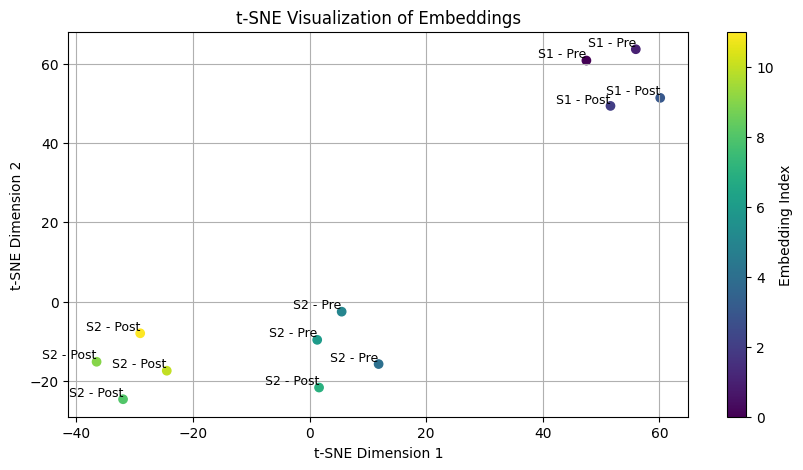

In [15]:
import datetime
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Step 1: Prepare a list of embeddings, sensor names, and original timestamps
embedding_cubes = [
    {"embeddings": s1_unmsk_patch[:, 0, :].cpu().numpy(), "sensor": "S1", "times": sentinel1_cube["original_time"]},
    {"embeddings": s2_unmsk_patch[:, 0, :].cpu().numpy(), "sensor": "S2", "times": sentinel2_cube["original_time"]},
    # {"embeddings": ls_unmsk_patch[:, 0, :].cpu().numpy(), "sensor": "LS", "times": landsat_cube["original_time"]},  # Example for Landsat
]
# Given comparison date
comparison_date = datetime.datetime(2024, 7, 9)

#Step 2: Combine embeddings, timestamps, and generate labels
combined_embeddings = []
combined_times = []
labels = []

for cube in embedding_cubes:
    embeddings = cube["embeddings"]
    times = cube["times"]
    sensor_name = cube["sensor"]
    
    # Append to combined lists
    combined_embeddings.append(embeddings)
    combined_times.extend(times)
    
    # Generate labels
    for timestamp in times:
        time_label = "Pre" if timestamp < comparison_date else "Post"
        labels.append(f"{sensor_name} - {time_label}")

# Concatenate embeddings into a single array
combined_embeddings = np.vstack(combined_embeddings)

# Step 3: Perform t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=4)
reduced_embeddings = tsne.fit_transform(combined_embeddings)

# Step 4: Plot the t-SNE results
plt.figure(figsize=(10, 5))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=np.arange(len(combined_embeddings)))
plt.colorbar(label="Embedding Index")
plt.title("t-SNE Visualization of Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)

# Add labels to each point
for i, (x, y) in enumerate(reduced_embeddings):
    plt.text(x, y, labels[i], fontsize=9, ha='right', va='bottom')

plt.show()

## Patch Embedding Visualization

This code focuses on visualizing **patch embeddings**, which are intermediate representations learned by the ClayMAE model for input image patches. The **ClayMAE model** is trained using a `patch_size` of `8`, and since the input image size is `256x256`, the resulting patch grid is `32x32` (256 ÷ 8 = 32).  

1. **Reorganize Embeddings**: Patch embeddings are rearranged into a structured `32x32` grid, enabling spatial visualization of each feature channel.  
2. **Difference Between Dates**: Embeddings for two different dates are subtracted to highlight changes over time or across specific regions.  
3. **Grid Visualization**: Each embedding channel is visualized as a small subplot using a diverging colormap (`bwr`), which highlights positive and negative differences in spatial features.  
4. **Purpose**: This visualization enables inspection of learned patch-level features, helping to identify patterns and temporal changes across the input images.  


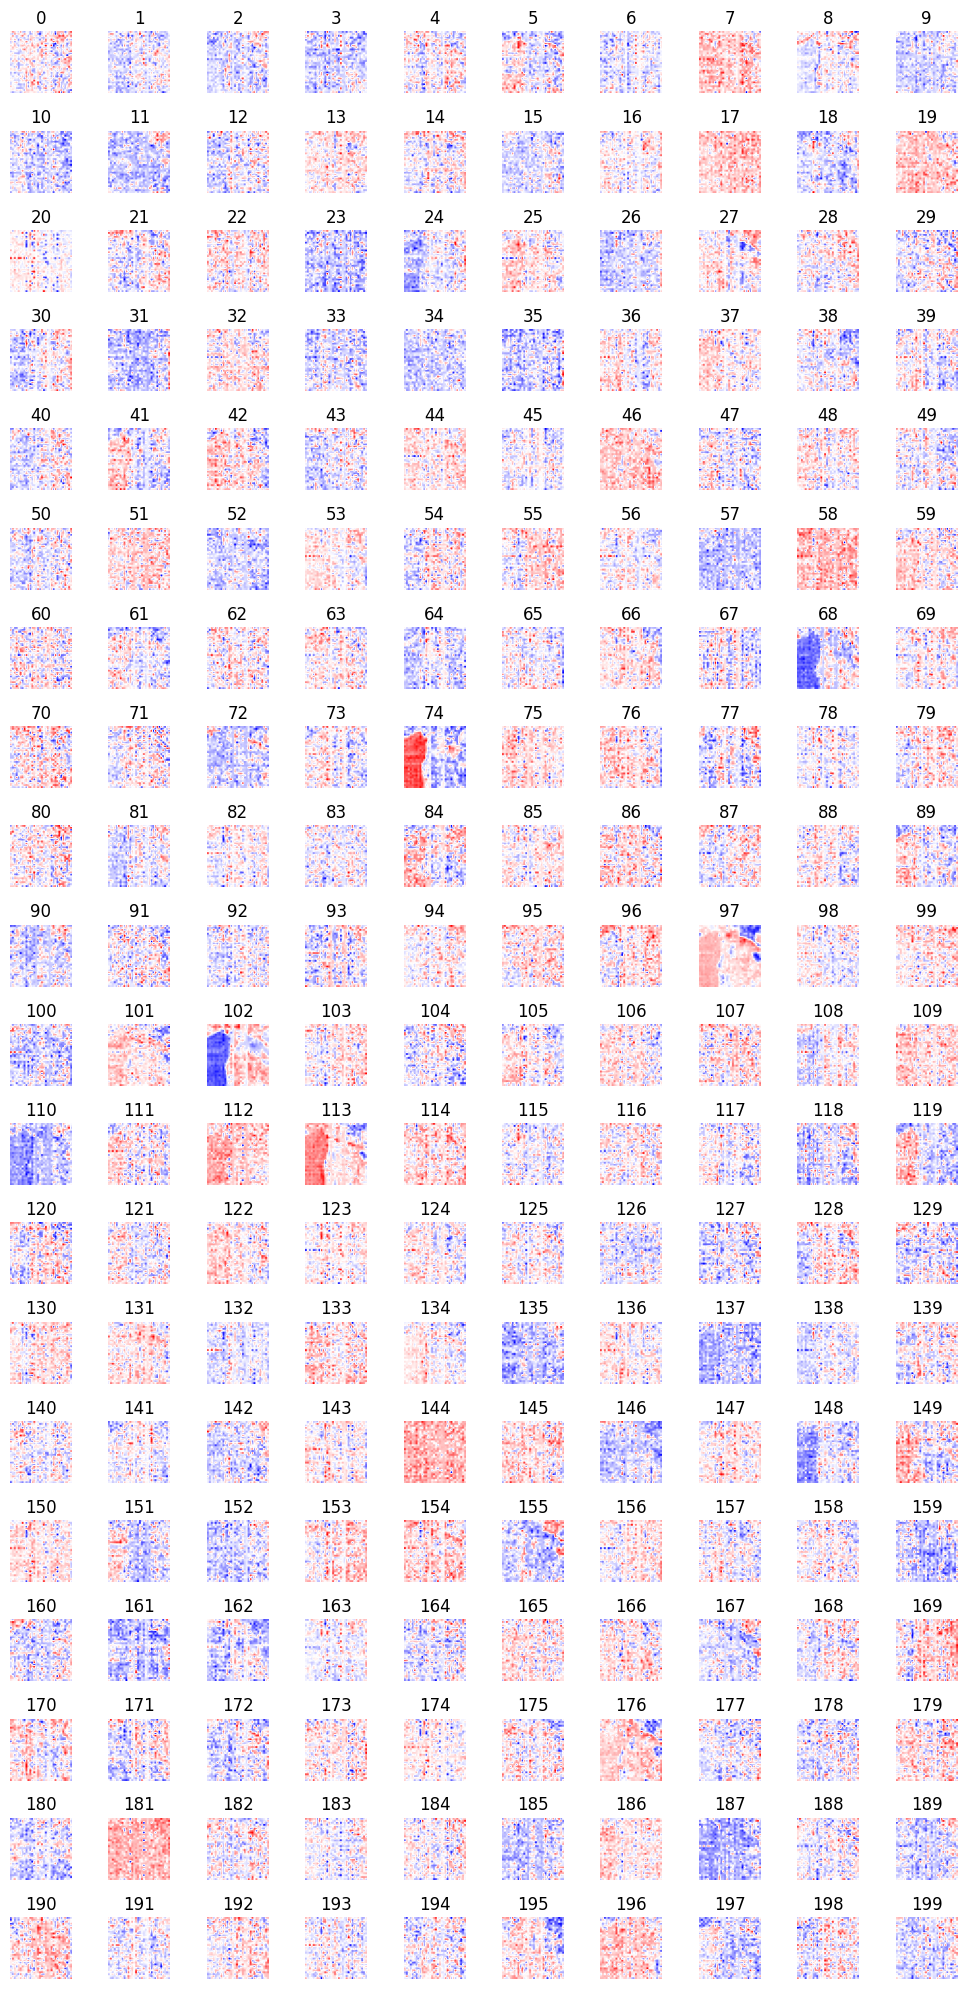

In [16]:
import matplotlib.pyplot as plt
from einops import rearrange

unmsk_embed = rearrange(
    s2_unmsk_patch[:, 1:, :].cpu().numpy(), "b (h w) d-> b d h w", h=32, w=32
    # s1_unmsk_patch[:, 1:, :].cpu().numpy(), "b (h w) d-> b d h w", h=32, w=32
)

embed = unmsk_embed[2] - unmsk_embed[4] # pick date index
# embed = unmsk_embed[0] - unmsk_embed[3] # pick date index
fig, axs = plt.subplots(20, 10, figsize=(10, 20))

for idx, ax in enumerate(axs.flatten()):
    ax.imshow(embed[idx], cmap="bwr")
    ax.set_axis_off()
    ax.set_title(idx)
    
plt.tight_layout()

# Integrating UAVSAR and Wordview Imagery into Clay Model

This section addresses challenges encountered while integrating **UAVSAR L-Band data** and **Wordview Imagery** into the Clay Foundation model. Integrating SAR and optical data remains a challenge due to differences in image alignment, georeferencing, spectral response, and resolution. The Clay model's dynamic embedding capabilities offer a promising solution, but futher evaluation is necessary to understand if this will provide a viable solution for my thesis. 

While preparing UAVSAR data, discrepancies in the representation of SAR wavelengths in the model's metadata became evident, particularly with **Sentinel-1 C-Band data**. 


## Problem Summary: Sentinel-1 Metadata and UAVSAR Integration

### Context
The model is pretrained on Sentinel-1 C-Band SAR data, with metadata that treats VV and VH polarizations as separate bands and assigns wavelengths of **3.5** and **4.0** respectively.

### Identified Problem
1. **Unit Discrepancy in Sentinel-1 Metadata**  
   - The wavelengths listed for Sentinel-1 (3.5 and 4.0) do not align with the standard C-Band wavelength (~56,000 µm or 5.6 cm).  
   - Additionally, these units appear inconsistent with the representation of wavelengths for other platforms in the metadata, which use micrometers (µm). For example:
     - Sentinel-2 L2A Metadata:  
       ```yaml
       wavelength:
         blue: 0.493
         green: 0.56
         red: 0.665
         rededge1: 0.704
         rededge2: 0.74
         rededge3: 0.783
         nir: 0.842
         nir08: 0.865
         swir16: 1.61
         swir22: 2.19
       ```
     - Sentinel-1 RTC Metadata:  
       ```yaml
       wavelength:
         vv: 3.5
         vh: 4.0
       ```
   - This raises questions about the expected wavelength units and their interpretation in the Clay model.
     

2. **UAVSAR Metadata Compatibility**  
   - UAVSAR data includes four polarizations (HH, HV, VH, VV), all at the same wavelength of **23.84 cm** (238,400 µm). However, this uniform wavelength is not reflected in the Sentinel-1 metadata format, where VV and VH are given distinct wavelength values.  
   - It is unclear how to represent UAVSAR polarizations in the metadata for consistency with the Clay model's existing structure.

### Key Questions
- What units or scaling were used for the Sentinel-1 wavelengths in the Clay model metadata?  
- How should UAVSAR polarizations and their shared wavelength be represented in the metadata for compatibility with the existing model structure?

I reached out to the Clay Model developers and created a github issue [here](https://github.com/Clay-foundation/model/issues/338)


## Incorporating WorldView Imagery into the Clay Model

To incorporate WorldView imagery into the Clay model, I need to follow these steps:

1. **Orthorectify Imagery**: Use GDAL's `gdalwarp` with RPCs and DEM data to orthorectify the NTF files.
2. **Convert to Cloud Optimized GeoTIFFs**: Split the orthorectified imagery into single-band Cloud Optimized GeoTIFFs (COGs) for each WorldView spectral band.
3. **Create Local STAC Catalog**: Generate a local STAC catalog to index the imagery, providing spatial and temporal metadata for each band.  [STAC catalog tutorial](https://stacspec.org/en/tutorials/2-create-stac-catalog-python/)
4. **Format for Model Input**: Organize the COGs and metadata into a directory structure or STAC-compatible catalog that aligns with the Clay model's input requirements.

I completed all of this in a separate file. 

### Create a data cube for Worldview-2, Sentinel-1, and Sentinel-2 for the same bounding box

In [17]:
start_end = ("2020-05-01", "2020-05-30")

bounds = (759957, 3851208, 762517, 3853768)

# WV2 Stack
wv2_cube = create_and_prepare_data_stack(
    bbox = bounds
    , start = start_end[0]
    , end = start_end[1]
    ,stac_source="local_stac/catalog.json"
    ,collection="worldview2-l1b"
    ,assets=["red","green","blue","nir1"]
    , bbox_crs="EPSG:32610"
    , target_crs="EPSG:32610"
    , out_resolution = 4
    , resampling_method = Resampling.cubic
    , metadata_path = "/home/jovyan/geoai_veg_map/clay_model/configs/metadata.yaml"
    , device = device
)

# Sentinel-1 Stack
sentinel1_cube2 = create_and_prepare_data_stack(
    bbox = bounds
    , start = start_end[0]
    , end = start_end[1]
    ,stac_source="https://planetarycomputer.microsoft.com/api/stac/v1"
    ,collection="sentinel-1-rtc"
    ,assets=["vv", "vh"]
    , bbox_crs="EPSG:32610"
    , target_crs="EPSG:32610"
    , out_resolution = 10
    , resampling_method = Resampling.cubic
    , metadata_path = "/home/jovyan/geoai_veg_map/clay_model/configs/metadata.yaml"
    , device = device
)

sentinel2_cube2 = create_and_prepare_data_stack(
    bbox = bounds
    , start = start_end[0]
    , end = start_end[1]
    ,stac_source="https://earth-search.aws.element84.com/v1"
    ,collection="sentinel-2-l2a"
    ,assets=["blue", "green", "red", "nir"]
    , bbox_crs="EPSG:32610"
    , target_crs="EPSG:32610"
    , out_resolution = 10
    , resampling_method = Resampling.cubic
    , metadata_path = "/home/jovyan/geoai_veg_map/clay_model/configs/metadata.yaml"
    , device = device
)


Opening local STAC catalog...
Found 2 items in the collection 'worldview2-l1b'
Original 'red' Image Resolution: 1.84 x 1.84 gsd.
Resampled Dimensions: 640 x 640 pixels (at 4x4 gsd). Stack EPSG:32610
Connecting to STAC API...


/home/jovyan/.cache/pypoetry/virtualenvs/geoai-veg-map-cAFrKsT4-py3.11/lib/python3.11/site-packages/pystac_client/item_search.py:903: FutureWarning: get_all_items() is deprecated, use item_collection() instead.
  warnings.warn(


Found 5 items in the collection 'sentinel-1-rtc'
Fetched SAS token for 'sentinel-1-rtc' collection.
Original 'vv' Image Resolution: 10.0 x 10.0 gsd.
Resampled Dimensions: 256 x 256 pixels (at 10x10 gsd). Stack EPSG:32610
Connecting to STAC API...


/home/jovyan/.cache/pypoetry/virtualenvs/geoai-veg-map-cAFrKsT4-py3.11/lib/python3.11/site-packages/pystac_client/item_search.py:903: FutureWarning: get_all_items() is deprecated, use item_collection() instead.
  warnings.warn(


Found 6 items in the collection 'sentinel-2-l2a'
Original 'blue' Image Resolution: 10.0 x 10.0 gsd.
Resampled Dimensions: 256 x 256 pixels (at 10x10 gsd). Stack EPSG:32610


### Run these through the model

In [18]:
with torch.no_grad():
    s2_unmsk_patch2, *_ = model.model.encoder(sentinel2_cube2)
    s1_unmsk_patch2, *_ = model.model.encoder(sentinel1_cube2)
    wv2_unmsk_patch, *_ = model.model.encoder(wv2_cube)

### Plot the image level embeddings for Worldview-2, Sentinel-1, and Sentinel-2 for the same bounding box
- The model puts these all in the same embedding space so we can plot them together now. 

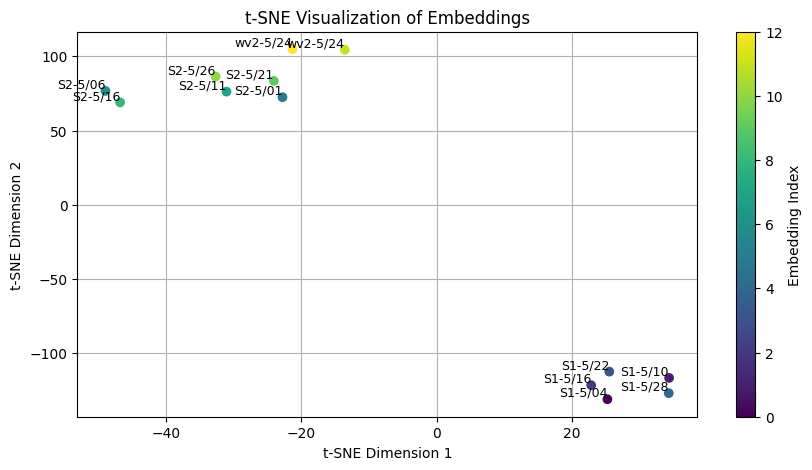

In [19]:
import datetime
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Step 1: Prepare a list of embeddings, sensor names, and original timestamps
embedding_cubes = [
    {"embeddings": s1_unmsk_patch2[:, 0, :].cpu().numpy(), "sensor": "S1", "times": sentinel1_cube2["original_time"]},
    {"embeddings": s2_unmsk_patch2[:, 0, :].cpu().numpy(), "sensor": "S2", "times": sentinel2_cube2["original_time"]},
    {"embeddings": wv2_unmsk_patch[:, 0, :].cpu().numpy(), "sensor": "wv2", "times": wv2_cube["original_time"]},  # Example for Landsat
]
# Given comparison date
comparison_date = datetime.datetime(2024, 7, 9)

#Step 2: Combine embeddings, timestamps, and generate labels
combined_embeddings = []
combined_times = []
labels = []

for cube in embedding_cubes:
    embeddings = cube["embeddings"]
    times = cube["times"]
    sensor_name = cube["sensor"]
    
    # Append to combined lists
    combined_embeddings.append(embeddings)
    combined_times.extend(times)
    
    # Generate labels
    for timestamp in times:
        time_label = timestamp.strftime("%-m/%d")
        labels.append(f"{sensor_name}-{time_label}")

# Concatenate embeddings into a single array
combined_embeddings = np.vstack(combined_embeddings)

# Step 3: Perform t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=4)
reduced_embeddings = tsne.fit_transform(combined_embeddings)

# Step 4: Plot the t-SNE results
plt.figure(figsize=(10, 5))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=np.arange(len(combined_embeddings)))
plt.colorbar(label="Embedding Index")
plt.title("t-SNE Visualization of Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)

# Add labels to each point
for i, (x, y) in enumerate(reduced_embeddings):
    plt.text(x, y, labels[i], fontsize=9, ha='right', va='bottom')

plt.show()

## Conclusion 
The code and plot above demonstrates that it is feasible to use the Clay Foundation model to fuse Sentinel-1, Sentinel-2, and Worldview-2 imagery. Based on the recommendations and feedback I received from the Clay developers, it appears that fusing the UAVSAR data is feasible as well. It will just require some pretraining. 

### Next Steps and Open Questions
- Build STAC library of UAVSAR data.
    - I need to ensure that the SAR product matches the Sentinel-2 product used in Clay pretraining
    - I will need to create a sizeable library of this for fine-tuning. I will also need to utilize other sensors in the fine-tuning process so the model doesn't overfit to just UAVSAR data. 
- Acquire my remaining Worldview imagery  
- Convert my UAV LiDAR data to a cloud optimized point cloud and build a STAC library for it
- Test the feasibility of using the [planetry computer 3DEP point cloud STAC](https://planetarycomputer.microsoft.com/dataset/3dep-lidar-copc) for my crewed airborne LiDAR data
